Using TensorFlow backend.


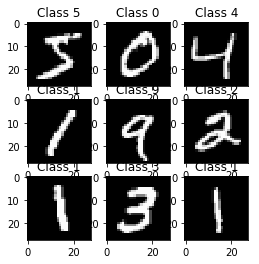

In [1]:
get_ipython().magic('matplotlib inline')


import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

np.random.seed(25)


# 下載 mnist 資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train: trainning data
# y_train: labels of each trainning data
# x_test: testing data
# y_test: labels of each testing data

plt.figure(figsize=(4,4))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])


In [2]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)
print(x_test.shape)
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


model = Sequential()
model.add(Conv2D(16, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Conv2D(36, (5,5), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

layer_utils.print_summary(model)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 58s 1ms/step - loss: 0.4852 - acc: 0.8492 - val_loss: 0.1063 - val_acc: 0.9678
Epoch 2/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1339 - acc: 0.9595 - val_loss: 0.0689 - val_acc: 0.9778
Epoch 3/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0995 - acc: 0.9708 - val_loss: 0.0610 - val_acc: 0.9808
Epoch 4/10
48000/48000 [==============================] - 57s 1ms/step - loss: 0.0818 - acc: 0.9754 - val_loss: 0.0508 - val_acc: 0.9838
Epoch 5/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0685 - acc: 0.9788 - val_loss: 0.0471 - val_acc: 0.9854
Epoch 6/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0610 - acc: 0.9813 - val_loss: 0.0386 - val_acc: 0.9879
Epoch 7/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0507 - acc: 0.9845 - val_loss: 0.0408 - val_acc

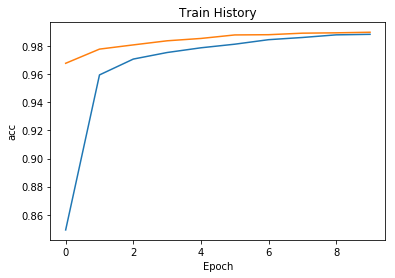

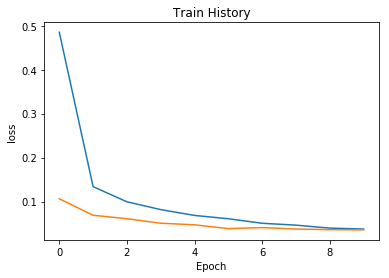

In [4]:

# 定義訓練方式
# loss function: 交叉熵
# optimizer: Adam
# 評估模型: 準確率
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# 開始訓練
y_train_onehot = np_utils.to_categorical(y_train)
#train_history = model.fit_generator(train_generator, steps_per_epoch=60000//300, epochs=10, 
#                    validation_data=test_generator, validation_steps=10000//300)
train_history = model.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)



show_train_history(train_history, 'acc', 'val_acc')

show_train_history(train_history, 'loss', 'val_loss')


In [5]:
y_test_onehot = np_utils.to_categorical(y_test)
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

results = model.predict_classes(x_test)
print()
print(results)


import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



10000/10000 [==============================] - 5s 511us/step

Accuracy 0.9908%

[7 2 1 ... 4 5 6]


In [6]:

import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


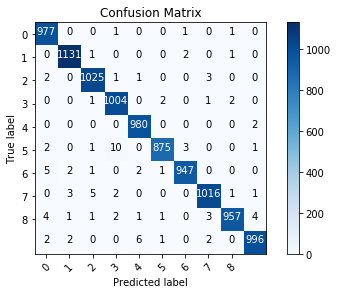

In [8]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results)

plot_confusion_matrix(cm, range(0, 9))




C:\Users\USER\Anaconda3.71016\envs\tensorflow\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


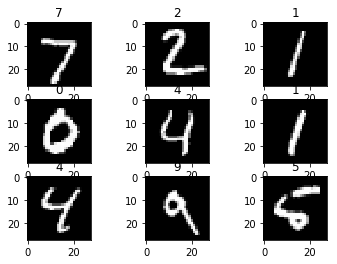

In [9]:

incorrect = np.where(y_test != results)[0]
test_set = np.squeeze(x_test, axis=3)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = incorrect[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}/{}".format(y_test[idx], results[idx]))

correct = np.where(y_test == results)[0]
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = correct[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}".format(y_test[idx]))


model.save_weights("cnn.h5")